In [1]:
library(Seurat)
library(tidyverse)

Loading required package: ggplot2

Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: Matrix

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()



In [47]:
rds = readRDS('/SGRNJ01/Aftersales/P2018016_Lung/paper_jiace/rds/new_ident_rm.rds')

In [48]:
info = read_tsv('/SGRNJ01/Aftersales/P2018016_Lung/paper_jiace/info/tidy_info.tsv')

Parsed with column specification:
cols(
  name = col_character(),
  orig = col_character(),
  new = col_character(),
  ID = col_double(),
  Gender = col_character(),
  Age = col_double(),
  Smoker = col_character(),
  Subtype = col_character(),
  T = col_double(),
  N = col_double(),
  M = col_double(),
  Stage = col_character(),
  Mutation = col_character(),
  mutation = col_character(),
  type = col_character()
)



In [50]:
head(info)

name,orig,new,ID,Gender,Age,Smoker,Subtype,T,N,M,Stage,Mutation,mutation,type
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
张炳山,S10T_1,P1,1140353,M,61,Y,LUSC,1,0,0,IA,0,Wt,LUSC
董永兴,S20T_1,P2,1144150,M,62,N,LUSC,1,0,0,IA,0,Wt,LUSC
陈荣华,S8T_1,P3,1141813,M,58,N,LUSC,1,0,0,IA,0,Wt,LUSC
郭文心,S58T-1,P4,1150416,M,76,Y,LUSC,1,0,0,IA,0,Wt,LUSC
赵水水,S66T-1,P5,1150869,F,62,N,LUSC,1,0,0,IA,0,Wt,LUSC
徐德禄,S26T_1,P6,1145936,M,73,Y,LUSC,2,2,0,IIIA,0,Wt,LUSC


In [53]:
head(rds@meta.data)

,nGene,nUMI,orig.ident,percent.mito,res.0.6,samples,new_ident
,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
GCTACACAGACA,4374,16580,S10T,0.11314837,0,P1,C0_Myeloid
TCCGGTCCCCCC,4289,15833,S10T,0.06789617,0,P1,C0_Myeloid
GCTAACATATAT,3664,12985,S10T,0.11220639,0,P1,C0_Myeloid
GACAGTTAGAGC,2992,11973,S10T,0.13664078,0,P1,C0_Myeloid
CCCTATCGCTGA,3014,11593,S10T,0.14560511,0,P1,C0_Myeloid
ATTGGCGACGAT,3149,10273,S10T,0.13803173,0,P1,C0_Myeloid


In [177]:
info.LUAD_wt= info[info$type=='LUAD_Wt' & (info$Stage != 'IB'),] 
info.LUAD_wt$name = ''
write_tsv(info.LUAD_wt,'/SGRNJ01/RD_dir/pipeline_test/zhouyiqi/Margarete/LUAD_gene_exp/results/patient_info.txt')

In [62]:
format_type = function(x){
    unlist(str_split(x,pattern = '_'))[2]
}
format_type('C0_Myeloid')

[1] "Myeloid"

In [70]:
rds@meta.data$cell_type = map_chr(rds@meta.data$new_ident,.f=format_type)

In [138]:
unique(rds@meta.data$cell_type)

[1] "Myeloid"     "LUSC"        "LUAD"        "Fibroblast"  "B"          
[6] "T"           "Epithelial"  "Endothelial"

In [140]:
rds.LUAD_wt = SubsetData(rds,subset.name = 'samples',accept.value = c('P18','P19','P20','P21'), subset.raw = T)

In [141]:
rds.LUAD_wt = SetAllIdent(rds.LUAD_wt, 'cell_type')
rds.LUAD_wt = SubsetData(rds.LUAD_wt,ident.remove = c('LUSC','Epithelial'))

In [123]:
head(rds.LUAD_wt@meta.data)

,nGene,nUMI,orig.ident,percent.mito,res.0.6,samples,new_ident,cell_type
,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
S18T_ACTAGTTTAATC,5592,35946,S18T,0.14805542,0,P18,C0_Myeloid,Myeloid
S18T_CCACTTCCTGGC,5410,28104,S18T,0.11446769,0,P18,C0_Myeloid,Myeloid
S18T_ACCCTAGGAATT,5260,22644,S18T,0.12493376,0,P18,C0_Myeloid,Myeloid
S18T_GTTATCGCAGAA,5003,21648,S18T,0.11049520,0,P18,C0_Myeloid,Myeloid
S18T_GAAGCTAACTAC,4373,19688,S18T,0.08355343,0,P18,C0_Myeloid,Myeloid
S18T_CGGCCCCTGTCA,4283,16887,S18T,0.12299402,0,P18,C0_Myeloid,Myeloid


In [142]:
stage_dict = info$Stage
names(stage_dict) = info$new

In [143]:
rds.LUAD_wt@meta.data$stage = stage_dict[rds.LUAD_wt@meta.data$samples]


In [144]:
# paste
meta = rds.LUAD_wt@meta.data
cols = c('cell_type','stage')
meta$combine <- apply( meta[ , cols ] , 1 , paste , collapse = "-" )
rds.LUAD_wt@meta.data = meta

In [145]:
rds.LUAD_wt = SetAllIdent(rds.LUAD_wt, 'combine')
save(rds.LUAD_wt, '/SGRNJ01/RD_dir/pipeline_test/zhouyiqi/Margarete_dir/LUAD/data/')

ERROR: Error in save(rds.LUAD_wt, "/SGRNJ01/RD_dir/pipeline_test/zhouyiqi/Margarete_dir/LUAD/data/"): object ‘/SGRNJ01/RD_dir/pipeline_test/zhouyiqi/Margarete_dir/LUAD/data/’ not found


In [146]:
setwd('/SGRNJ01/RD_dir/pipeline_test/zhouyiqi/Margarete/LUAD_gene_exp/results')
genes = read_tsv('gene_symbol.txt')

Parsed with column specification:
cols(
  gene_symbol = col_character(),
  gene_biotype = col_character()
)



In [147]:
types = unique(genes$gene_biotype)

In [148]:
head(rds.LUAD_wt@meta.data)

,nGene,nUMI,orig.ident,percent.mito,res.0.6,samples,new_ident,cell_type,stage,combine
,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
S18T_ACTAGTTTAATC,5592,35946,S18T,0.14805542,0,P18,C0_Myeloid,Myeloid,IA,Myeloid-IA
S18T_CCACTTCCTGGC,5410,28104,S18T,0.11446769,0,P18,C0_Myeloid,Myeloid,IA,Myeloid-IA
S18T_ACCCTAGGAATT,5260,22644,S18T,0.12493376,0,P18,C0_Myeloid,Myeloid,IA,Myeloid-IA
S18T_GTTATCGCAGAA,5003,21648,S18T,0.11049520,0,P18,C0_Myeloid,Myeloid,IA,Myeloid-IA
S18T_GAAGCTAACTAC,4373,19688,S18T,0.08355343,0,P18,C0_Myeloid,Myeloid,IA,Myeloid-IA
S18T_CGGCCCCTGTCA,4283,16887,S18T,0.12299402,0,P18,C0_Myeloid,Myeloid,IA,Myeloid-IA


In [149]:
head(genes)

gene_symbol,gene_biotype
<chr>,<chr>
MT-TF,Mitochondrial_genes
MT-RNP1,Mitochondrial_genes
MT-TV,Mitochondrial_genes
MT-RNP2,Mitochondrial_genes
MT-TL1,Mitochondrial_genes
MT-ND1,Mitochondrial_genes


In [165]:
genes.all = rownames(rds.LUAD_wt@raw.data)

In [166]:
# test
type = 'Mitochondrial_genes'
genes.given = genes[genes$gene_biotype == type,]$gene_symbol
genes.plot = intersect(genes.given, genes.all)


In [168]:
genes.given

[1] "MT-TF"   "MT-RNP1" "MT-TV"   "MT-RNP2" "MT-TL1"  "MT-ND1"  "MT-ND2" 
 [8] "MT-ND3"  "MT-ND4"  "MT-ND5"  "MT-ND6"  "MT-TI"   "MT-TQ"   "MT-TM"  
[15] "MT-TW"   "MT-TA"   "MT-TN"   "MT-TC"   "MT-TY"   "MT-CO1"  "MT-CO2" 
[22] "MT-CO3"  "MT-TS1"  "MT-TD"   "MT-TK"   "MT-ATP8" "MT-ATP6" "MT-T6"  
[29] "MT-TR"   "MT-ND4L" "MT-TH"   "MT-TS2"  "MT-TL2"  "MT-CYB"  "MT-TT"  
[36] "MT-TP"

In [172]:
genes.given[!genes.given %in% genes.all]

[1] "MT-RNP1" "MT-RNP2" "MT-T6"

In [173]:
genes.plot

[1] "MT-TF"   "MT-TV"   "MT-TL1"  "MT-ND1"  "MT-ND2"  "MT-ND3"  "MT-ND4" 
 [8] "MT-ND5"  "MT-ND6"  "MT-TI"   "MT-TQ"   "MT-TM"   "MT-TW"   "MT-TA"  
[15] "MT-TN"   "MT-TC"   "MT-TY"   "MT-CO1"  "MT-CO2"  "MT-CO3"  "MT-TS1" 
[22] "MT-TD"   "MT-TK"   "MT-ATP8" "MT-ATP6" "MT-TR"   "MT-ND4L" "MT-TH"  
[29] "MT-TS2"  "MT-TL2"  "MT-CYB"  "MT-TT"   "MT-TP"

In [153]:
head(rds.LUAD_wt@meta.data)

,nGene,nUMI,orig.ident,percent.mito,res.0.6,samples,new_ident,cell_type,stage,combine
,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
S18T_ACTAGTTTAATC,5592,35946,S18T,0.14805542,0,P18,C0_Myeloid,Myeloid,IA,Myeloid-IA
S18T_CCACTTCCTGGC,5410,28104,S18T,0.11446769,0,P18,C0_Myeloid,Myeloid,IA,Myeloid-IA
S18T_ACCCTAGGAATT,5260,22644,S18T,0.12493376,0,P18,C0_Myeloid,Myeloid,IA,Myeloid-IA
S18T_GTTATCGCAGAA,5003,21648,S18T,0.11049520,0,P18,C0_Myeloid,Myeloid,IA,Myeloid-IA
S18T_GAAGCTAACTAC,4373,19688,S18T,0.08355343,0,P18,C0_Myeloid,Myeloid,IA,Myeloid-IA
S18T_CGGCCCCTGTCA,4283,16887,S18T,0.12299402,0,P18,C0_Myeloid,Myeloid,IA,Myeloid-IA


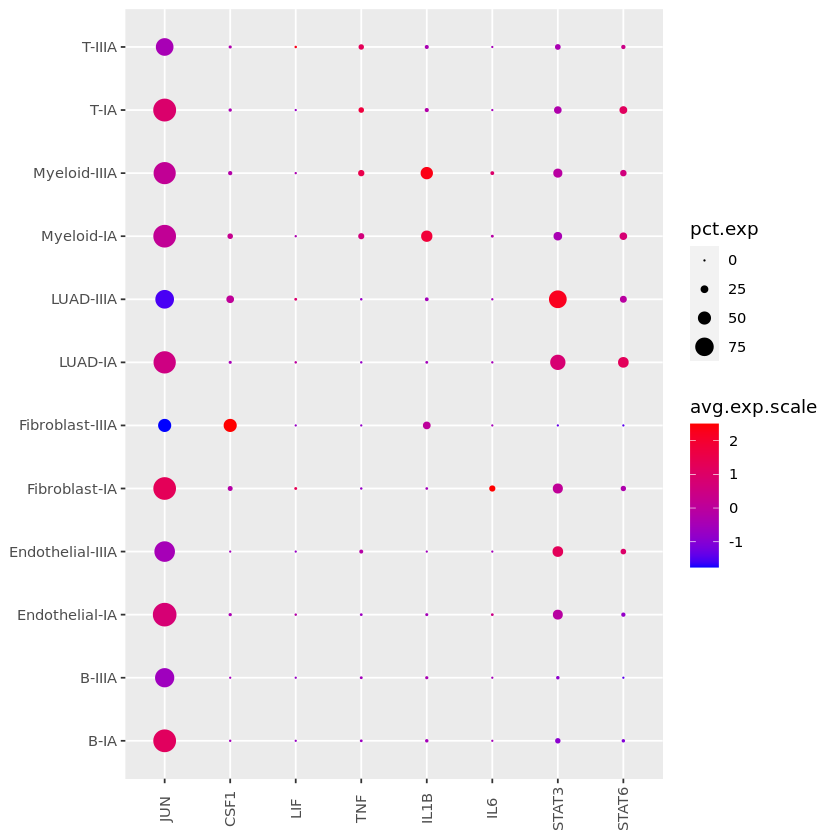

In [157]:
DotPlot(rds.LUAD_wt, genes.plot = genes.plot, plot.legend = T, x.lab.rot = T,cols.use = c('blue','red'))

In [158]:
for (type in types){
    genes.given = genes[genes$gene_biotype == type,]$gene_symbol
    genes.plot = intersect(genes.given, genes.all)
    pdf_name = str_glue('{type}_LUAD_exp.pdf')
    pdf(pdf_name, height=8, width=(length(genes.plot)/2 + 5))
    DotPlot(rds.LUAD_wt, genes.plot = genes.plot, plot.legend = T, x.lab.rot = T)
    dev.off()    
}